In [1]:
import numpy as np
import matplotlib.pyplot as plt

/var/folders/1s/wjx12t_j5h7gnb2g26c4dv8h0000gn/T/ipykernel_15209/494033172.py:30: RuntimeWarning: invalid value encountered in arcsin
  ii = np.degrees(np.arcsin(np.sin(np.radians(ang))*a2/a1))


Text(0, 0.5, 'depth')

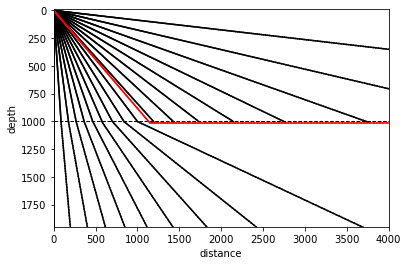

In [67]:
a1 = 6
a2 = 8

tt = np.linspace(0,10,500)
inc_ang = 45

z1 = 1e3


def step(t,v,a):
    return (t*v)*np.sin(np.radians(a)),(t*v)*np.cos(np.radians(a))

fig = plt.figure()

ax = fig.subplots(1,1)
ax.set_ylim([1.95e3,-10])
ax.set_xlim([0,4e3])

# ax.axhline(0,color='black')
ax.axhline(z1,color='black',linestyle='--',linewidth=1)

for ang in np.arange(0,90,5):
    x0 = y0 = 0
    for t in tt:
        if y0<z1:
            aa = a1
            ii = ang
        else:
            aa = a2
            ii = np.degrees(np.arcsin(np.sin(np.radians(ang))*a2/a1))

        xt,yt = step(t,aa,ii)
        xn = x0+xt
        yn = y0+yt

        ax.plot([x0,xn],[y0,yn],'-k')

        x0 = xn
        y0 = yn
        
ang = np.degrees(np.arcsin(a1/a2))
x0 = y0 = 0
for t in tt:
    if y0<z1:
        aa = a1
        ii = ang
    else:
        aa = a2
        ii = np.degrees(np.arcsin(np.sin(np.radians(ang))*a2/a1))

    xt,yt = step(t,aa,ii)
    xn = x0+xt
    yn = y0+yt

    ax.plot([x0,xn],[y0,yn],'-r')

    x0 = xn
    y0 = yn

ax.set_xlabel('distance')
ax.set_ylabel('depth')

/var/folders/1s/wjx12t_j5h7gnb2g26c4dv8h0000gn/T/ipykernel_15209/3070884248.py:2: RuntimeWarning: invalid value encountered in arcsin
  np.degrees(np.arcsin(np.sin(np.radians(np.linspace(0,90,1000)))*a2/a1)),


Text(0, 0.5, 'refraction angle')

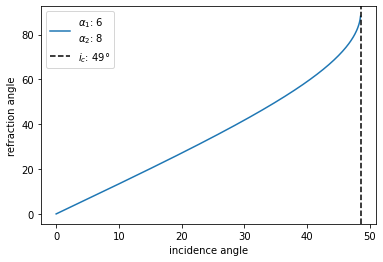

In [52]:
plt.plot(np.linspace(0,90,1000),
         np.degrees(np.arcsin(np.sin(np.radians(np.linspace(0,90,1000)))*a2/a1)),
         label=r'$\alpha_{1}$: '+str(a1)+'\n'+r'$\alpha_{2}$: '+str(a2)
        )

plt.axvline(np.degrees(np.arcsin(a1/a2)),linestyle='--',color='k',label=r'$i_c$: %.0f°'%np.degrees(np.arcsin(a1/a2)))
plt.legend()
plt.xlabel('incidence angle')
plt.ylabel('refraction angle')

Text(0, 0.5, 'time')

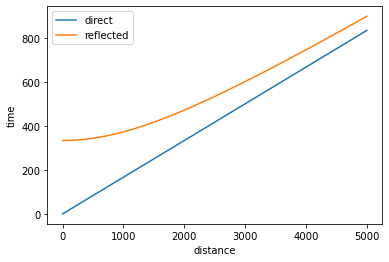

In [61]:
a1 = 6
z1 = 1e3

fdir = lambda x,v: x/v
fref = lambda x,v,z: (2/v)*np.sqrt(z**2 + x**2/4)


xmax = 5e3
plt.plot(np.linspace(0,xmax,100),fdir(np.linspace(0,xmax,100),a1),'-',label='direct')
plt.plot(np.linspace(0,xmax,100),fref(np.linspace(0,xmax,100),a1,z1),'-',label='reflected')

plt.legend()

plt.xlabel('distance')
plt.ylabel('time')

# Dipping layers

In [70]:
a1 = 5
a2 = 10

ic = np.round(np.degrees(np.arcsin(a1/a2)),3)

fad = lambda d: a1/np.sin(np.radians(ic+d))
fau = lambda d: a1/np.sin(np.radians(ic-d))


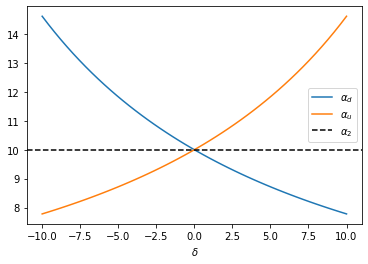

In [81]:
dd = np.linspace(-10,10,50)

plt.plot(dd,fad(dd),'-',label=r'$\alpha_{d}$');
plt.plot(dd,fau(dd),'-',label=r'$\alpha_{u}$');
plt.axhline(a2,linestyle='--',color='k',label=r'$\alpha_{2}$')

plt.xlabel(r'$\delta$')
plt.legend();